### Airbnb Stock Price Prediction

Welcome to the Airbnb Stock Price Prediction project! The goal of this project is to predict the future stock prices of Airbnb using historical stock data and time series analysis. Data

The data used in this project is historical stock data for Airbnb from the beginning of their public trading in December 2020 until present. The data includes information such as date, opening price, closing price, and trading volume. Methods

The main method used in this project is the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model, which is a type of time series analysis model that takes into account both seasonality and trends in the data. Other time series analysis methods such as ARIMA and Holt-Winters were also explored and compared to SARIMAX. Results

The SARIMAX model was able to accurately predict future stock prices for Airbnb with a high degree of accuracy. The model's predictions were compared to the actual closing prices and had a low mean absolute error. 

In [102]:
#import the necessary library

In [1]:
import pandas as pd
import numpy as np
import os,sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ABNB.csv')
df = df.round(decimals=2, out=None)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/12/2020,146.55,151.50,135.10,139.25,139.25,26980800
1,14/12/2020,135.00,135.30,125.16,130.00,130.00,16966100
2,15/12/2020,126.69,127.60,121.50,124.80,124.80,10914400
3,16/12/2020,125.83,142.00,124.91,137.99,137.99,20409600
4,17/12/2020,143.00,152.45,142.67,147.05,147.05,15054700
...,...,...,...,...,...,...,...
513,23/12/2022,195.22,196.43,168.78,195.68,195.68,12725200
514,26/12/2022,200.52,200.73,167.73,200.71,200.71,12292600
515,27/12/2022,203.65,204.48,165.02,204.44,204.44,11995400
516,28/12/2022,201.33,201.85,165.71,201.78,201.78,10181100



### Exploratory Data Analysis (EDA)

EDA is applied to investigate the data and summarize the key insights. It gives the basic understanding of your data, it's distribution, null values and much more. Datasets can be explored using graphs or through some python functions. There will be two type of analysis. Univariate and Bivariate.


In [3]:
# check if there are any null values in Dataset

df.isnull().sum()

Date           0
 Open          0
 High          0
 Low           0
 Close         0
 Adj Close     0
Volume         0
dtype: int64

In [4]:
# Checking datatypes in Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         518 non-null    object 
 1    Open        518 non-null    float64
 2    High        518 non-null    float64
 3    Low         518 non-null    float64
 4    Close       518 non-null    float64
 5    Adj Close   518 non-null    float64
 6   Volume       518 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.5+ KB


In [5]:
df.shape

(518, 7)

In [6]:
# Describing Dataset

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,518.000000,518.000000,518.000000,518.000000,518.000000,5.180000e+02
mean,157.798822,161.337799,151.841564,157.921351,157.921351,6.872775e+06
std,29.957001,30.378565,27.175130,29.991601,29.991601,4.439196e+06
min,88.880000,91.460000,86.710000,89.080000,89.080000,1.995400e+06
25%,141.292500,144.237500,137.212500,141.295000,141.295000,4.215100e+06
50%,160.760000,166.325000,156.940000,161.815000,161.815000,5.617750e+06
75%,178.510000,182.750000,170.105000,179.870000,179.870000,8.092625e+06
max,216.240000,219.940000,209.090000,216.840000,216.840000,3.975500e+07


In [7]:
# data Correlation

df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993039,0.963876,0.986861,0.986861,-0.073811
High,0.993039,1.000000,0.968064,0.993337,0.993337,-0.040587
Low,0.963876,0.968064,1.000000,0.962828,0.962828,-0.146283
Close,0.986861,0.993337,0.962828,1.000000,1.000000,-0.050470
Adj Close,0.986861,0.993337,0.962828,1.000000,1.000000,-0.050470
Volume,-0.073811,-0.040587,-0.146283,-0.050470,-0.050470,1.000000


<AxesSubplot: >

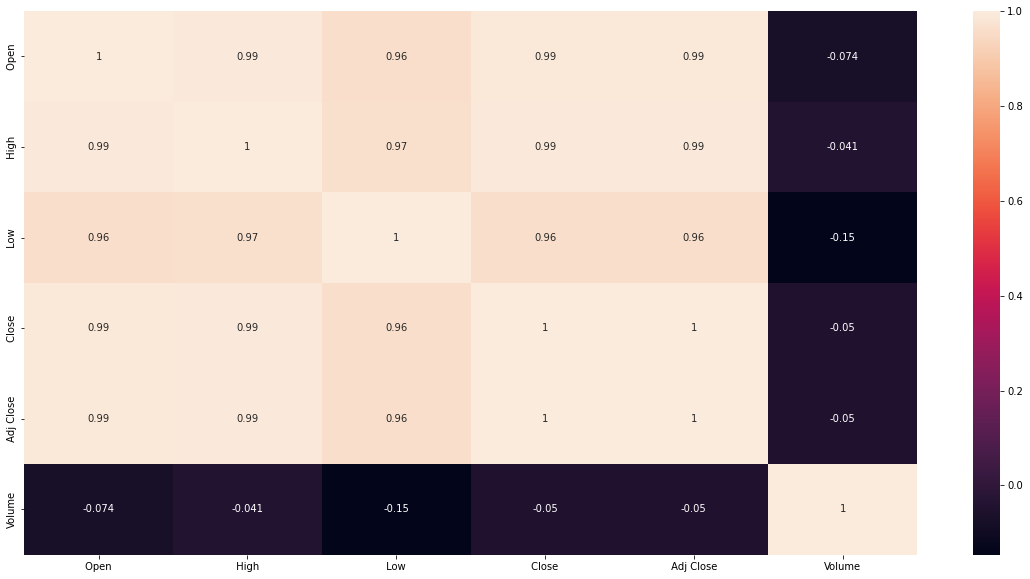

In [8]:
#Visualizing correlation among data 

fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [9]:
# Changing Dtype of Date to datetime

df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df.set_index('Date',inplace=True)

In [10]:
# Make copy of data

df1 = df.copy()
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.55,151.50,135.10,139.25,139.25,26980800
2020-12-14,135.00,135.30,125.16,130.00,130.00,16966100
2020-12-15,126.69,127.60,121.50,124.80,124.80,10914400
2020-12-16,125.83,142.00,124.91,137.99,137.99,20409600
2020-12-17,143.00,152.45,142.67,147.05,147.05,15054700


In [11]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.55,151.50,135.10,139.25,139.25,26980800
2020-12-14,135.00,135.30,125.16,130.00,130.00,16966100
2020-12-15,126.69,127.60,121.50,124.80,124.80,10914400
2020-12-16,125.83,142.00,124.91,137.99,137.99,20409600
2020-12-17,143.00,152.45,142.67,147.05,147.05,15054700


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 518 entries, 2020-12-11 to 2022-12-29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Open        518 non-null    float64
 1    High        518 non-null    float64
 2    Low         518 non-null    float64
 3    Close       518 non-null    float64
 4    Adj Close   518 non-null    float64
 5   Volume       518 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 28.3 KB


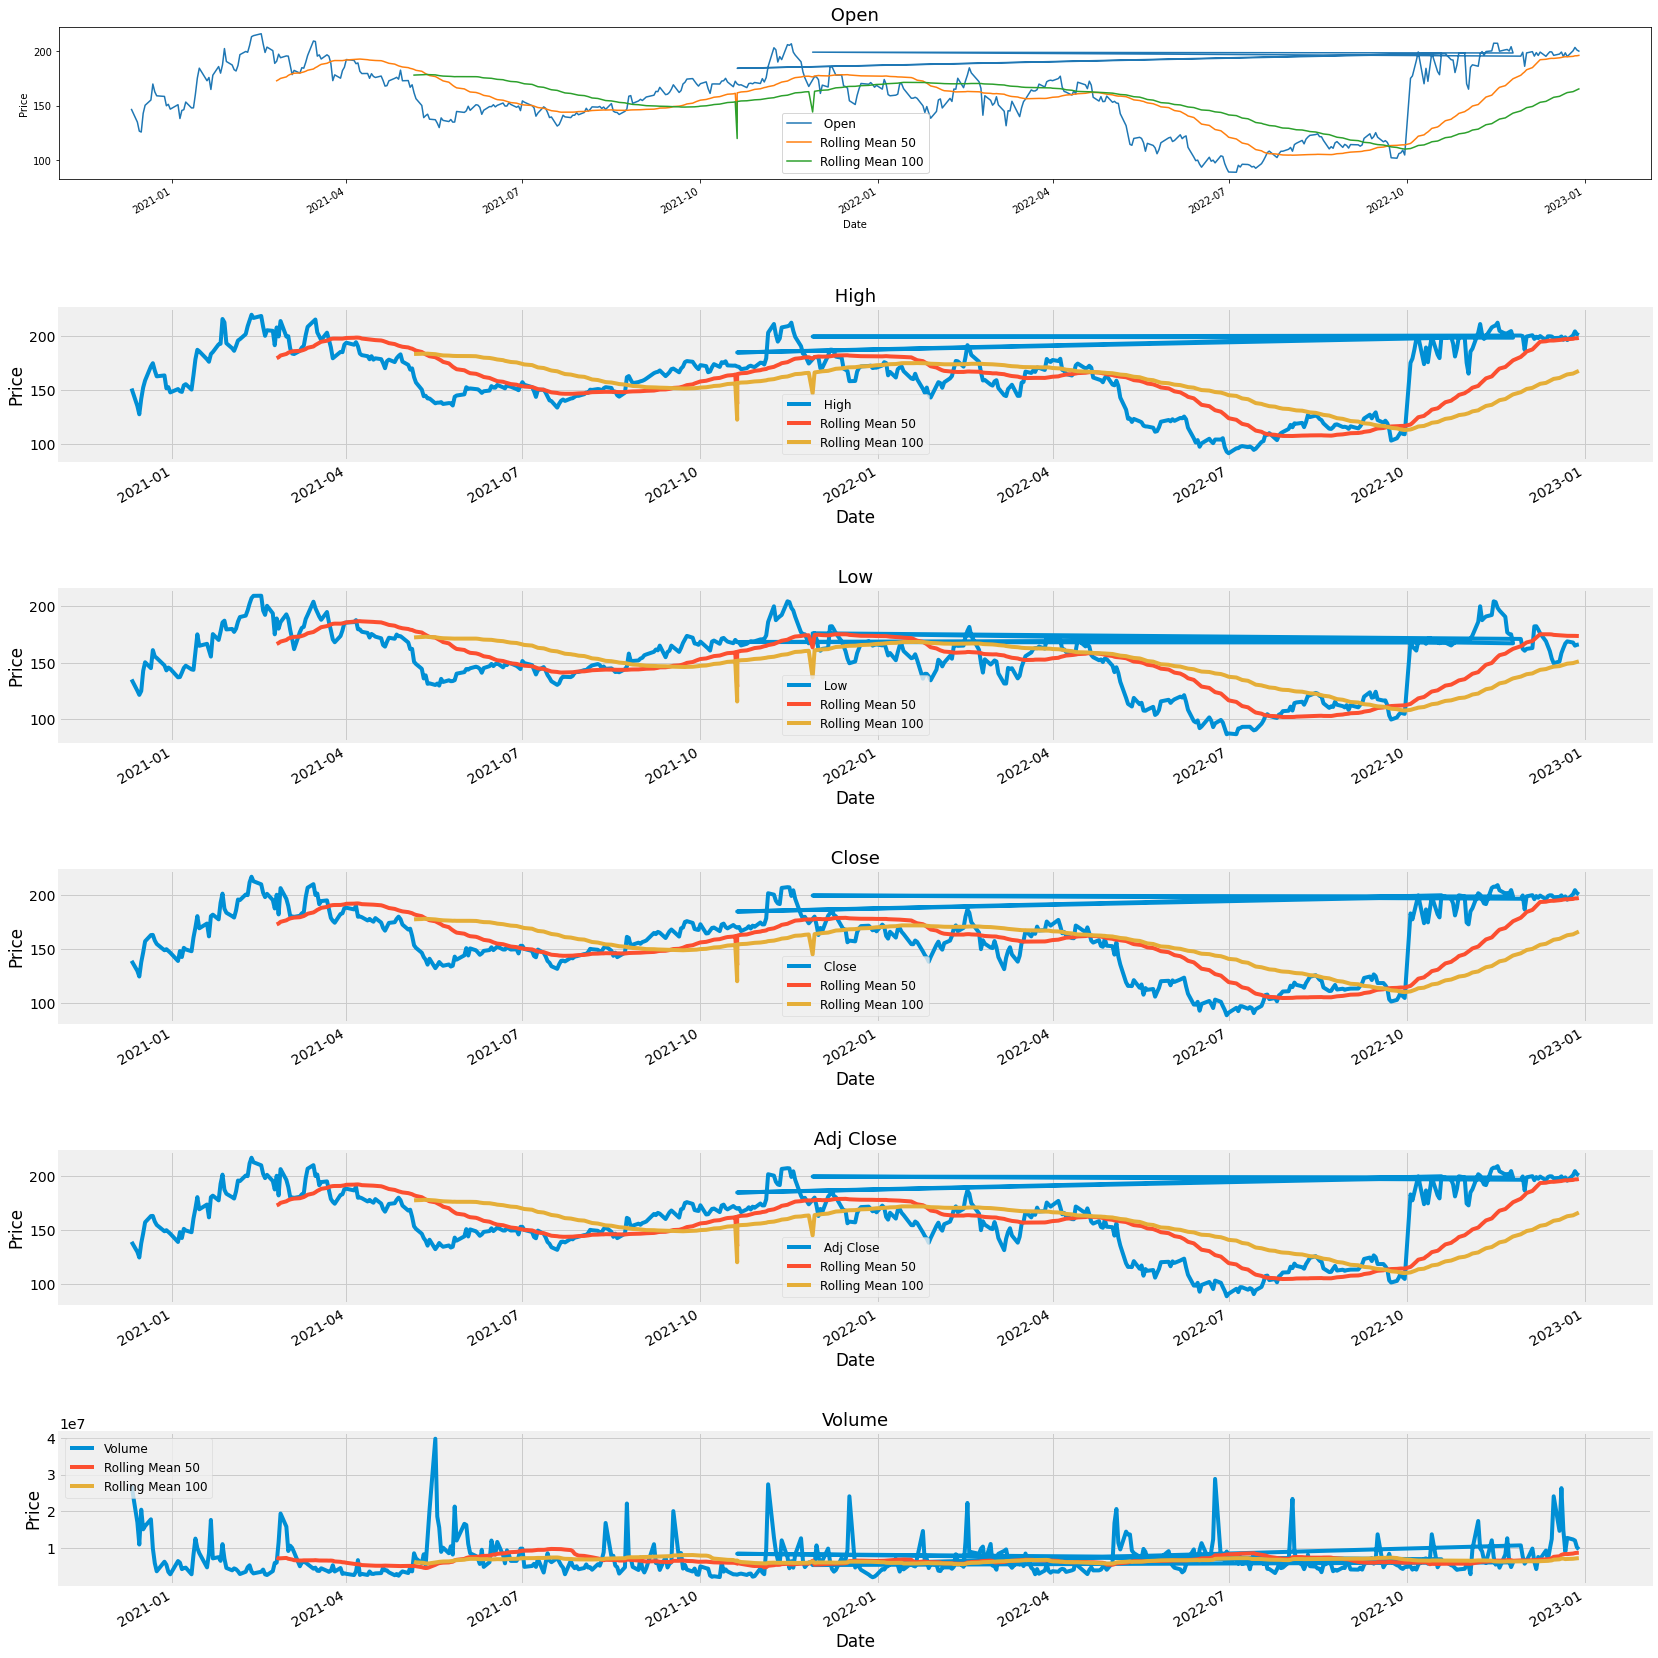

In [13]:
cols = df1.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(df1.iloc[:,i],label=cols[i])
  df1.iloc[:,i].rolling(50).mean().plot(label='Rolling Mean 50')
  df1.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean 100')
  ax.set_title(cols[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

In [14]:
df1.columns

Index([' Open ', ' High ', ' Low ', ' Close ', ' Adj Close ', 'Volume'], dtype='object')

In [15]:
# Droping Columns
df1 = df1.drop([' Open ', ' High ', ' Low ', ' Adj Close ', 'Volume'], axis=1)
df1

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05
...,...
2022-12-23,195.68
2022-12-26,200.71
2022-12-27,204.44


In [16]:
## Arranging Columns

columns_ = [ ' Close ' ]
df1= df1.reindex(columns=columns_)
df1

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05
...,...
2022-12-23,195.68
2022-12-26,200.71
2022-12-27,204.44


In [17]:
# Resampling Data to Month by Aggregating using mean

monthly_mean = df1[ ' Close ' ].resample('M').mean()

In [18]:
monthly_df = monthly_mean.to_frame()
monthly_df

,Close
Date,
2020-12-31,147.834286
2021-01-31,168.434737
2021-02-28,197.915789
2021-03-31,188.755217
2021-04-30,177.565714
2021-05-31,143.784500
2021-06-30,149.068182
2021-07-31,142.302381
2021-08-31,150.015909


In [19]:
monthly_data = df1[ ' Close ' ]
monthly_data = monthly_data.to_frame()
monthly_data

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05
...,...
2022-12-23,195.68
2022-12-26,200.71
2022-12-27,204.44


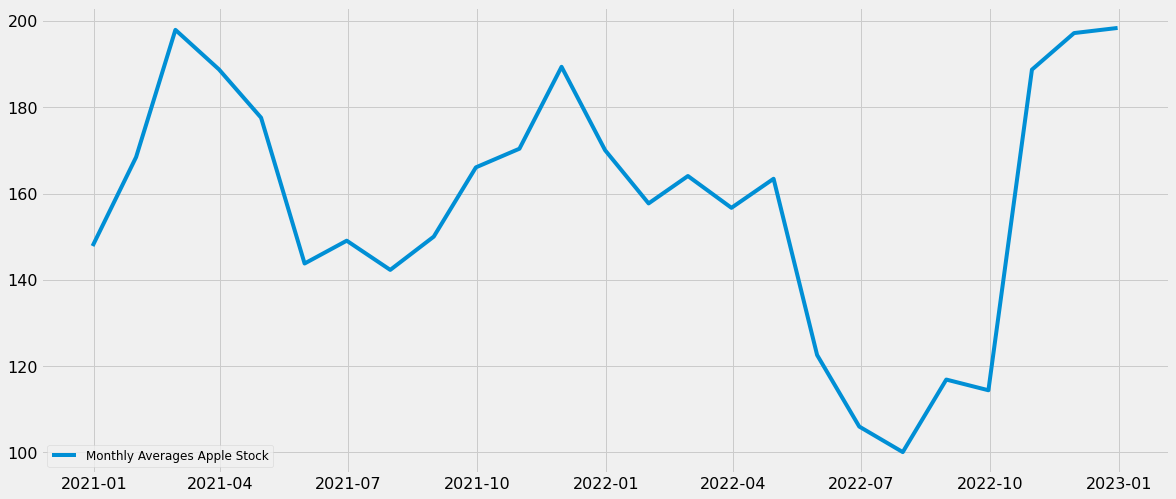

In [20]:
# Monthly Stock Prices 
fig = plt.figure(figsize=(18,8))

plt.plot(monthly_df[ ' Close ' ],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [21]:
# Quarterly Trend 

monthly_df['Year'] = monthly_df.index.year
monthly_df['Month'] = monthly_df.index.strftime('%B')
monthly_df['dayofweek'] = monthly_df.index.strftime('%A')
monthly_df['quarter'] = monthly_df.index.quarter
monthly_df.head()

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2020-12-31,147.834286,2020,December,Thursday,4
2021-01-31,168.434737,2021,January,Sunday,1
2021-02-28,197.915789,2021,February,Sunday,1
2021-03-31,188.755217,2021,March,Wednesday,1
2021-04-30,177.565714,2021,April,Friday,2


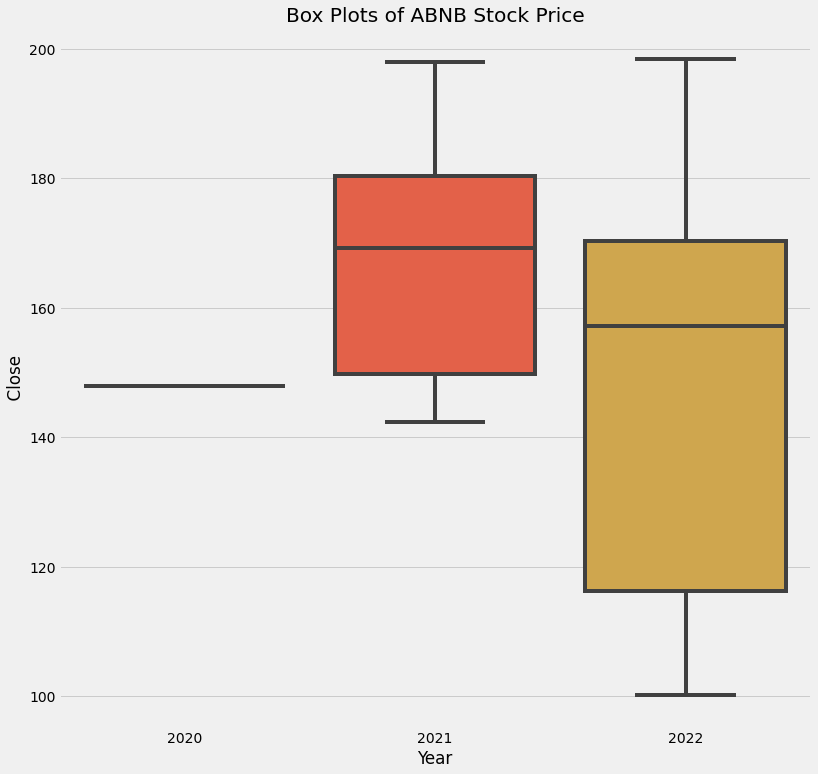

In [22]:
#Box-Plot

plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_df['Year'],y=monthly_df[ ' Close ' ])
ax.set_title('Box Plots of ABNB Stock Price')
plt.style.context('fivethirtyeight')

No outliers Present

Lot of Variability in Years 2022

Downwardt trend is shown

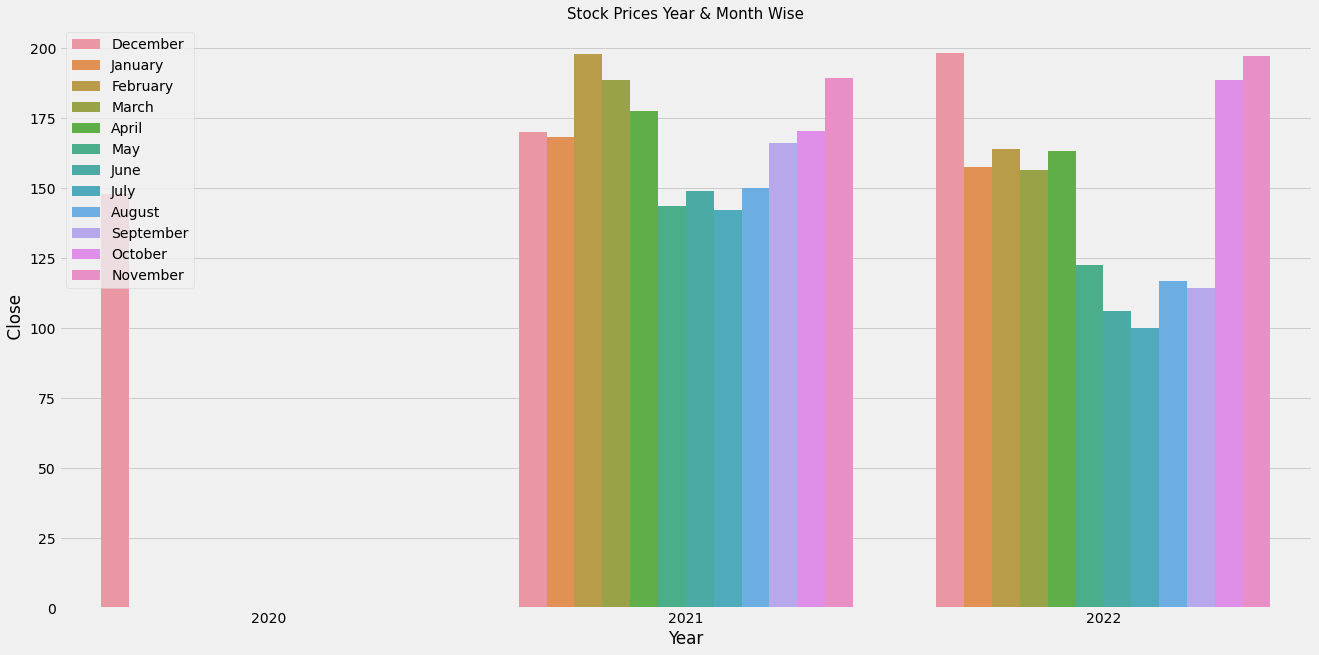

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("Paired", 4)
a = sns.barplot(x="Year", y=" Close ",hue = 'Month',data=monthly_df)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

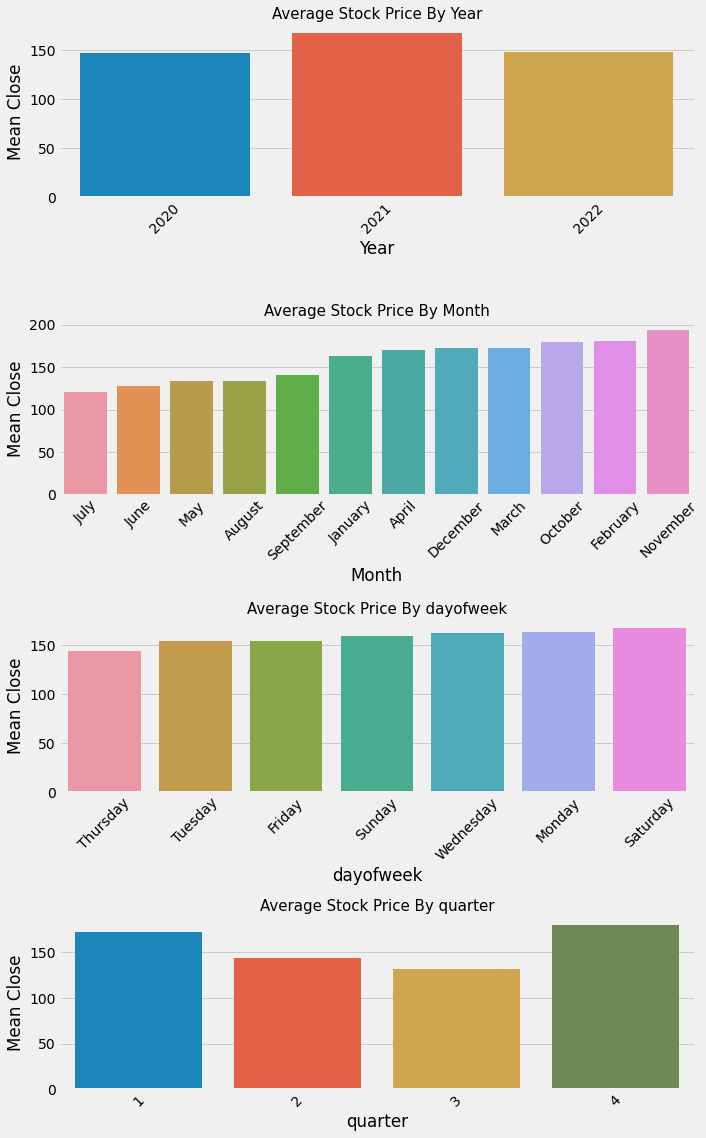

In [24]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_df.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_df.groupby(str(i))[" Close "].mean()).reset_index().sort_values(' Close ')
  sns.barplot(data=Aggregated,x=str(i),y=" Close ",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## Decomposition of Time Series

In [25]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 1440x1152 with 0 Axes>

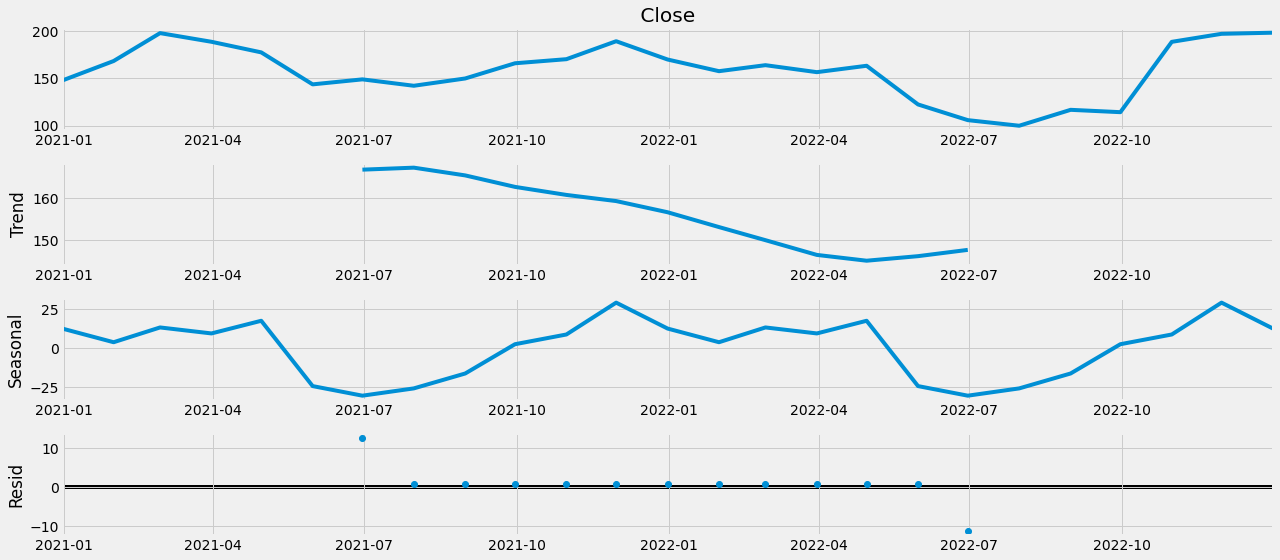

In [26]:
rcParams['figure.figsize']=18,8

plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_df[' Close '],model='additive')
decomposed_series.plot()
plt.show()

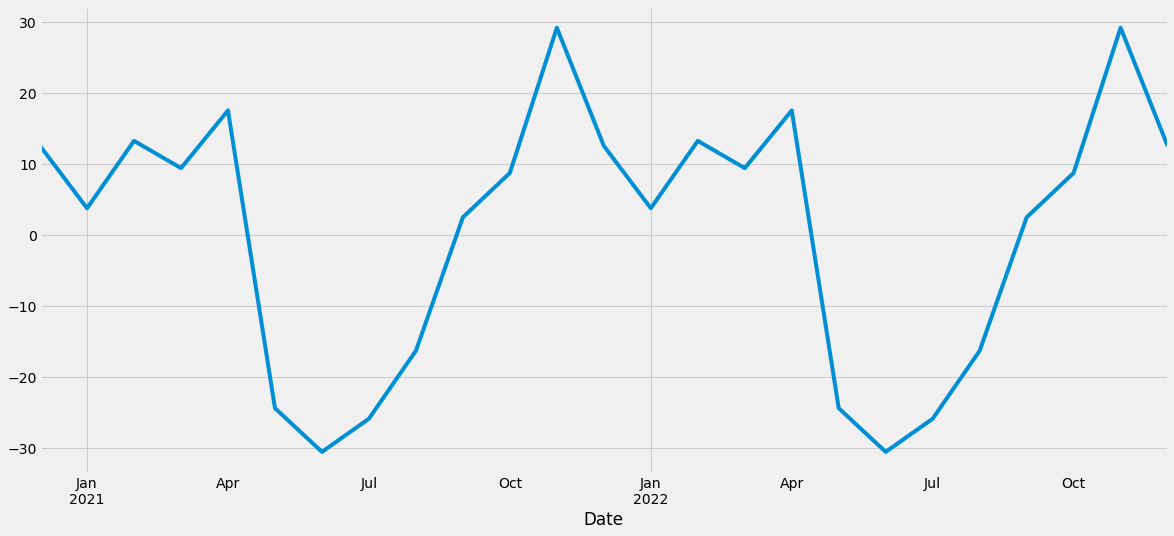

<Figure size 576x576 with 0 Axes>

In [27]:
##Drilling Down and Observing Seasonality

decomposed_series.seasonal['2020':'2022'].plot()
fig = plt.figure(figsize=(8,8))


Stationarity and Non-Stationarity of Time Series

    Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality

    But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.



In [28]:
df1

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05
...,...
2022-12-23,195.68
2022-12-26,200.71
2022-12-27,204.44


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [30]:
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

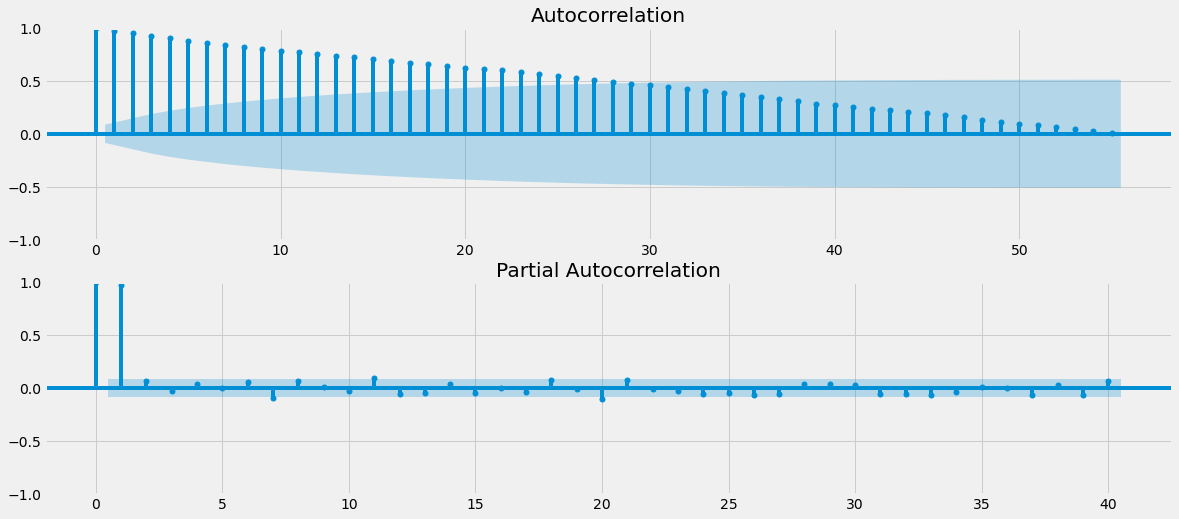

In [31]:
plt.figure()
plt.subplot(211)
plot_acf(df1, ax=plt.gca(), lags = 55)
plt.subplot(212)
plot_pacf(df1, ax=plt.gca(), lags = 40)
plt.show()


Plotting Rolling Statistics

We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.


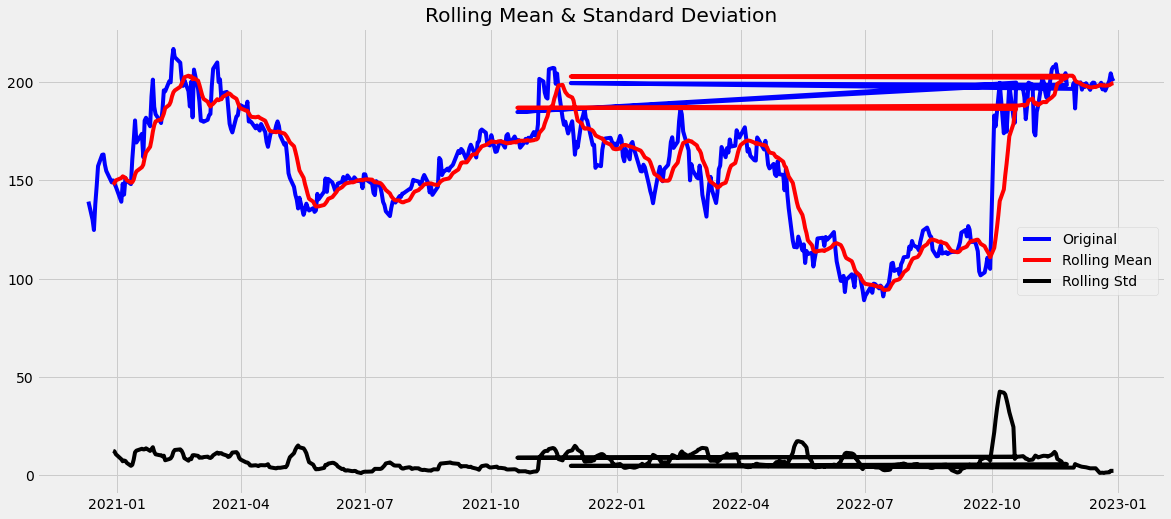

In [32]:
#Determing rolling statistics

rolmean = df1.rolling(12).mean()
rolstd = df1.rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df1[' Close '], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
    
The time series is hence not stationary

### Augmented Dickey-Fuller Test

The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t).

Null hypothesis: The time series is not stationary

Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

#### Using ADF(Augmented Dickey-Fuller) Test

Null Hypothesis(H0) : Time series has a unit root -It is non-stationary

Alternate Hypothesis(H1) : Time series does not have a unit root -It is stationary



In [33]:
## Testing Stationarity Using ADF

from statsmodels.tsa.stattools import adfuller

In [34]:
test_result = adfuller(df1[' Close '])

def adfuller_test(Close):
    result = adfuller(Close)
    labels = ['ADF Test statistic', 'p-value', '#Lag Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject Null Hypothesis(Ho), Time Series is Stationary ")
    else:
        print("Failed to Reject Null Hypothesis(Ho), Time Series is Non-Stationary")


adfuller_test(df1[' Close '])



ADF Test statistic : -2.2845892295450256
p-value : 0.1769864321835034
#Lag Used : 1
Number of Observations Used : 516
Failed to Reject Null Hypothesis(Ho), Time Series is Non-Stationary


Statistically verified by ADF Test- that we failed to Reject Null Hypothesis(Ho) our Time Series is Non-Stationary and as observed earlier also by Decomposition(Trend and Seasonality Present)

### Making Time Series Stationary

There are 2 major reasons behind non-stationaruty of a TS:

    Trend – varying mean over time. For eg, in this case we saw that on average, the number of stock prices was growing over time.

    Seasonality – variations at specific time-frames.



Differencing

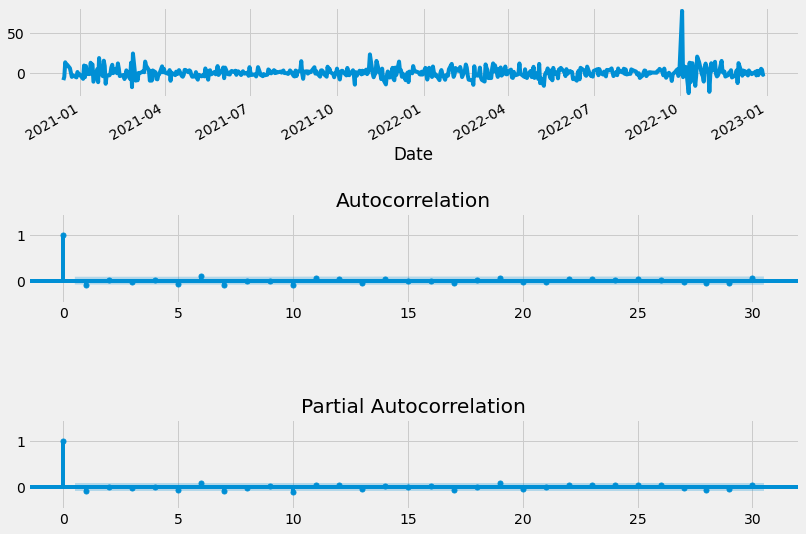

In [35]:
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(12,8))
df1[' Close '].diff().plot(ax=ax1)
plot_acf(df1[' Close '].diff().dropna(),lags=30,ax=ax2)
ax2.set_ylim(-0.5,1.5)
plot_pacf(df1[' Close '].diff().dropna(),lags=30,ax=ax3)
ax3.set_ylim(-0.5,1.5)
plt.tight_layout(pad=2)
plt.show()



In [36]:
adfuller_test(df1[' Close '].diff().dropna())

ADF Test statistic : -25.004769443993528
p-value : 0.0
#Lag Used : 0
Number of Observations Used : 516
Reject Null Hypothesis(Ho), Time Series is Stationary 


In [37]:
df1.head()

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05


### Model Building
#### ARIMA MODEL

    ARIMA – Auto Regression Integrated Moving Average Model.
    It goes through differencing steps to eliminate the non-stationary part.
    ARIMA Models are specified by three order parameters: (p, d, q)
        p is the order of the AR term,
        q is the order of the MA term,
        d is the number of differencing required to make the time series stationary
    An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms.



In [38]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.55,151.50,135.10,139.25,139.25,26980800
2020-12-14,135.00,135.30,125.16,130.00,130.00,16966100
2020-12-15,126.69,127.60,121.50,124.80,124.80,10914400
2020-12-16,125.83,142.00,124.91,137.99,137.99,20409600
2020-12-17,143.00,152.45,142.67,147.05,147.05,15054700


In [39]:
df.drop([" Open ",' High ',' Low ',' Adj Close ','Volume'], axis = 1, inplace = True)
df.head()

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05


In [40]:
# Splitting Data into Train and Test

split_date = "2022-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)



Train data : (268, 1)
Test data : (250, 1)


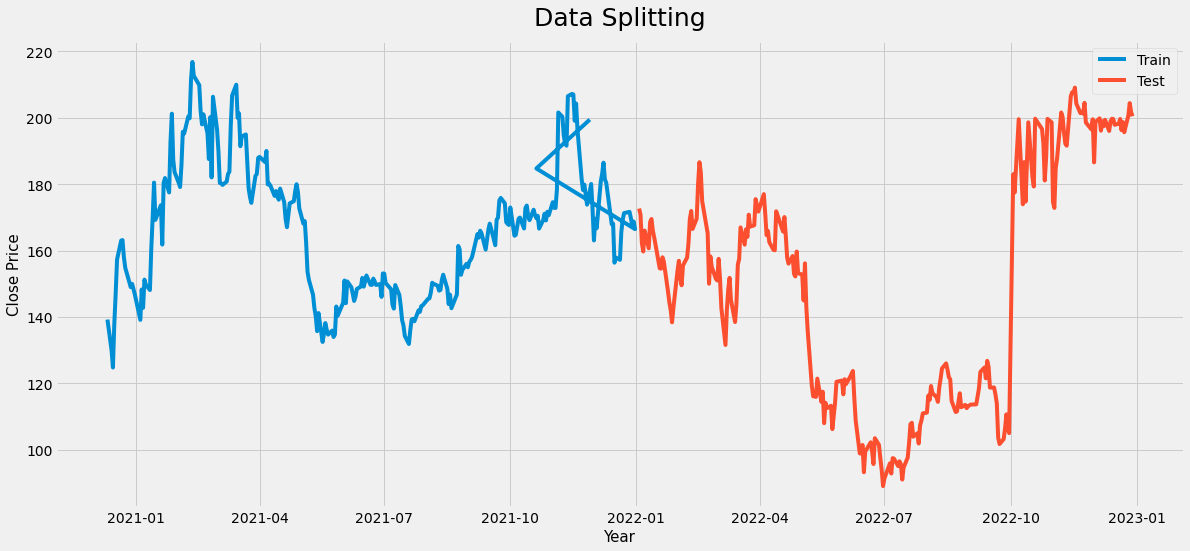

In [41]:
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.title("Data Splitting", size = 25, y = 1.02)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend()
plt.show()

In [42]:
# Auto-Arima

from pmdarima import auto_arima

In [43]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1715.336, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1717.175, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1718.572, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1718.639, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1715.554, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1720.801, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1721.030, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1717.334, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1717.779, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1719.623, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1718.984, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1719.684, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1717.702, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1713.713, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  268
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -851.856
Date:                Mon, 23 Jan 2023   AIC                           1713.713
Time:                        13:00:39   BIC                           1731.649
Sample:                             0   HQIC                          1720.918
                                - 268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6862      0.062    -11.019      0.000      -0.808      -0.564
ar.L2         -0.8829      0.056    -15.774      0.000      -0.993      -0.773
ma.L1          0.6602      0.043     15.397      0.000       0.576       0.744
ma.L2          0.9630      0.042     22.741      0.000       0.880       1.046
sigma2        34.4507      2.218     15.530      0.000      30.103      38.798
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                44.39
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.57
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train[' Close '],order = (1,1,1))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Close    No. Observations:                  268
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -856.017
Date:                Mon, 23 Jan 2023   AIC                           1718.034
Time:                        13:00:39   BIC                           1728.796
Sample:                             0   HQIC                          1722.357
                                - 268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6046      0.449     -1.347      0.178      -1.484       0.275
ma.L1          0.5445      0.469      1.161      0.246      -0.375       1.463
sigma2        35.6674      2.286     15.601      0.000      31.187      40.148
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                55.11
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.67
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+249,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2022-01-03,199.255697
2022-01-04,199.391300
2022-01-05,199.309320
2022-01-06,199.358881
2022-01-07,199.328919
...,...
2022-12-23,199.340208
2022-12-26,199.340208
2022-12-27,199.340208


In [46]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2022-01-05      199.255697
2022-01-06      199.391300
2022-01-07      199.309320
2022-01-10      199.358881
2022-01-11      199.328919
...                    ...
2022-12-23      199.340208
2022-12-26      199.340208
2022-12-27      199.340208
2022-12-28      199.340208
2022-12-29      199.340208

[250 rows x 1 columns]


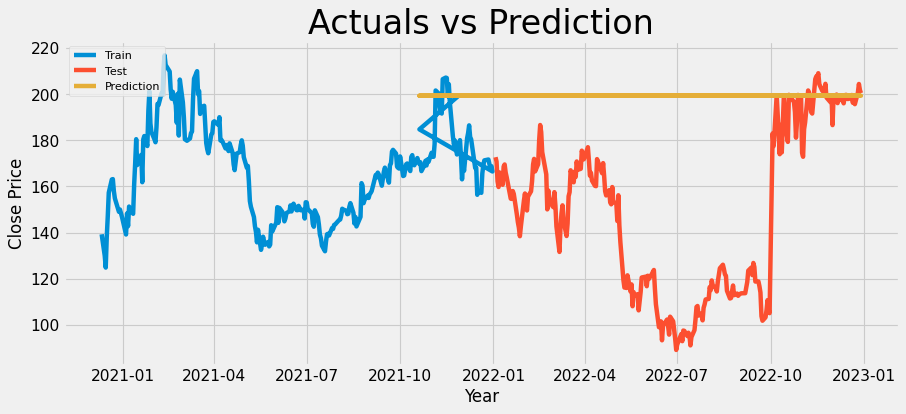

In [47]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

Here, we got straight line because we have seasonal patterns in our data. So, ARIMA Model wont work for us.

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

RMSE : It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.
Mean absolute error:

It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors. MAE measures only the magnitude of the errors and doesn’t concern itself with their direction. The lower the MAE, the higher the accuracy of a model.
RMSE : It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.
Mean absolute error:

It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors. MAE measures only the magnitude of the errors and doesn’t concern itself with their direction. The lower the MAE, the higher the accuracy of a model.


In [49]:
mse = mean_squared_error(test_pred['predicted_mean'],test[' Close '])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test[' Close '])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test[' Close '])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  3846.6466770956863
Root Mean Squared Error (RMSE) =  62.02
Mean Absolute Error (MAE)  =  51.40447743003539
Mean Absolute Percentage Error (MAPE)  =  0.2578732399831217


### SARIMA MODEL

 An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA - Seasonal Autoregressive Integrated Moving Average.
    
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

    P: Seasonal autoregressive order.

    D: Seasonal difference order.
    
    Q: Seasonal moving average order.
    
    m: The number of time steps for a single seasonal period.



In [50]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 24)
SARIMAX: (0, 1, 1) x (0, 1, 2, 24)
SARIMAX: (0, 1, 2) x (1, 1, 0, 24)
SARIMAX: (0, 1, 2) x (1, 1, 1, 24)


In [51]:
import statsmodels.api as sm

In [52]:
model_SA = sm.tsa.SARIMAX(train[' Close '], order=(0,1,2), seasonal_order=(1,1,0,66))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Close    No. Observations:                  268
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood                -691.315
Date:                             Mon, 23 Jan 2023   AIC                           1390.629
Time:                                     13:01:01   BIC                           1403.843
Sample:                                          0   HQIC                          1395.976
                                             - 268                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0342      0.060     -0.569      0.570      -0.152       0.084
ma.L2          0.0249      0.067      0.372      0.710      -0.106       0.156
ar.S.L66      -0.3950      0.088     -4.492      0.000      -0.567      -0.223
sigma2        53.7942      4.906     10.964      0.000      44.178      63.410
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.98   Prob(JB):                         0.12
Heteroskedasticity (H):               0.63   Skew:                             0.08
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+249,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2022-01-03,201.083227
2022-01-04,199.107664
2022-01-05,199.229149
2022-01-06,199.621698
2022-01-07,200.308550
...,...
2022-12-23,298.459096
2022-12-26,296.752760
2022-12-27,295.704472


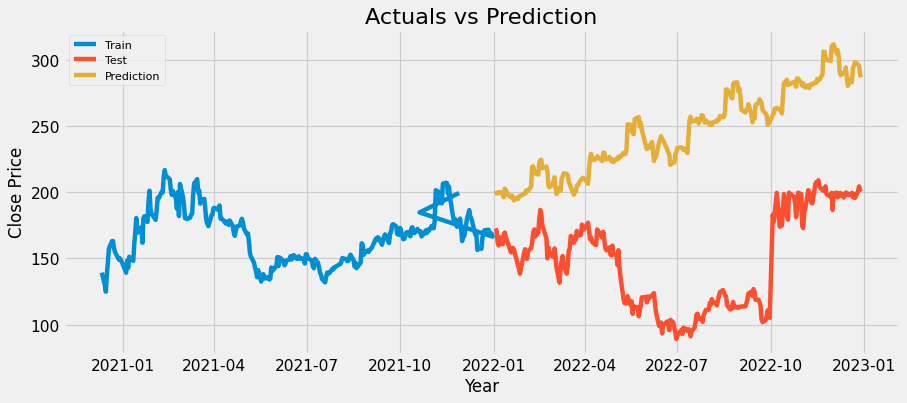

In [54]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train[' Close '], label = 'Train')
plt.plot(test[' Close '], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()


    ** Here, in SARIMA Model we can see that prediction is showing an upward trend. So, We can use this model for future Prediction**
    ** Also we have to predict for next 30 days, So Sarima is the good model to go with it because, SARIMA model is accurate on short-period forecasting but less accurate on long-period forecasting.**



In [55]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test[' Close '])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test[' Close '])
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test[' Close '])
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  11105.914878866051
Root Mean Squared Error (RMSE) =  105.38
Mean Absolute Error (MAE)  =  97.1108358290357
Mean Absolute Percentage Error (MAPE)  =  0.3887412927785098


### Forecast for next 30 days ( Using Sarima Model)

In [56]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2022-12-29', end = '2023-01-29')
forecast_SA.index=index_future_dates
print(forecast_SA)

2022-12-29    285.819831
2022-12-30    278.132218
2022-12-31    280.087691
2023-01-01    280.087343
2023-01-02    285.757293
2023-01-03    287.016799
2023-01-04    290.592263
2023-01-05    291.045147
2023-01-06    291.047796
2023-01-07    289.612165
2023-01-08    290.134373
2023-01-09    286.907779
2023-01-10    299.989216
2023-01-11    310.553944
2023-01-12    313.167469
2023-01-13    309.386563
2023-01-14    309.540792
2023-01-15    310.518353
2023-01-16    311.664702
2023-01-17    310.599470
2023-01-18    307.902725
2023-01-19    314.277205
2023-01-20    314.026492
2023-01-21    310.889311
2023-01-22    308.711603
2023-01-23    310.499282
2023-01-24    308.458979
2023-01-25    307.064420
2023-01-26    308.796502
2023-01-27    306.943540
2023-01-28    308.863092
2023-01-29    310.008308
Freq: D, Name: predicted_mean, dtype: float64


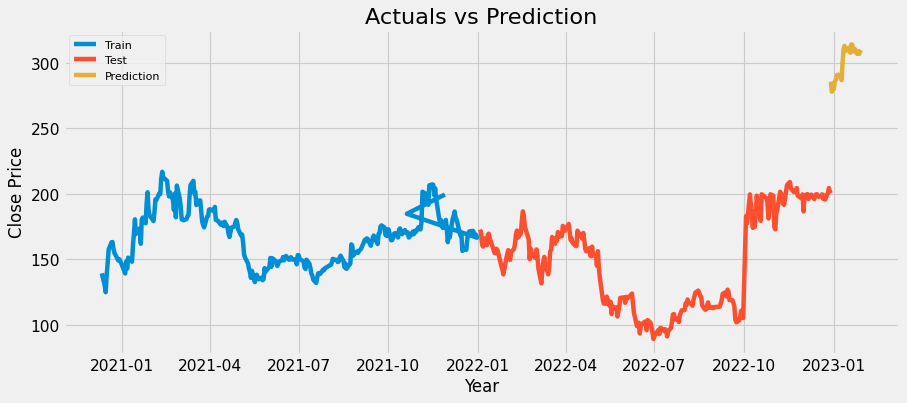

In [57]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train[' Close '], label = 'Train')
plt.plot(test[' Close '], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Holt Winter's  Method

In [58]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

+ Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
+ Set the value of Alpha and define m (Time Period)'''

In [59]:
m = 24
alpha = 1/(2*m)

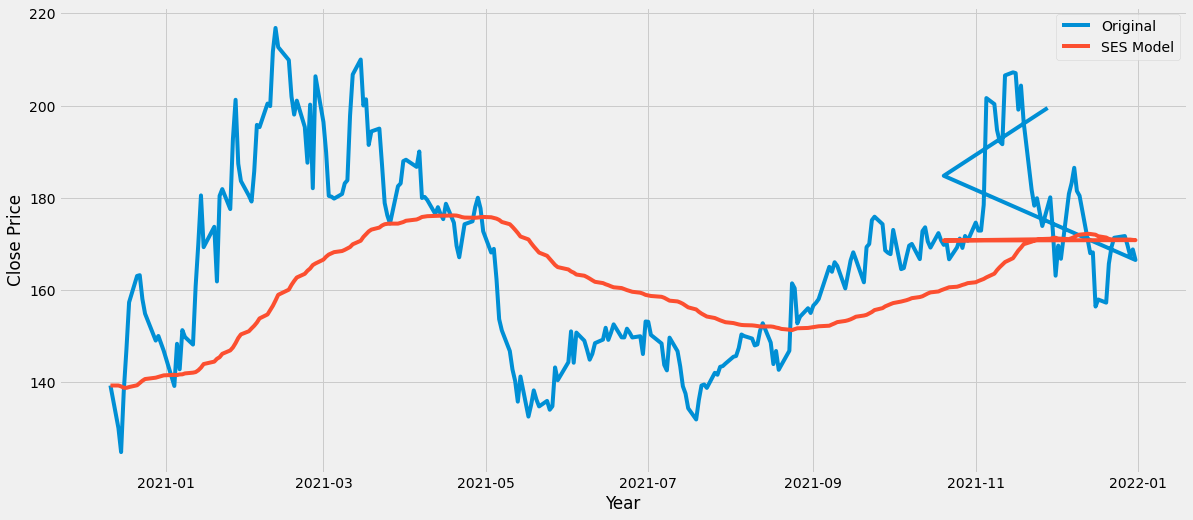

In [60]:

ses_model = SimpleExpSmoothing(train[" Close "]).fit(smoothing_level=alpha, optimized=False)

# Add the fitted values to the DataFrame
train["ses_model"] = ses_model.fittedvalues

# Plot the original data and the fitted values
plt.plot(train[" Close "], label='Original')
plt.plot(train["ses_model"], label='SES Model')
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend()
plt.show()

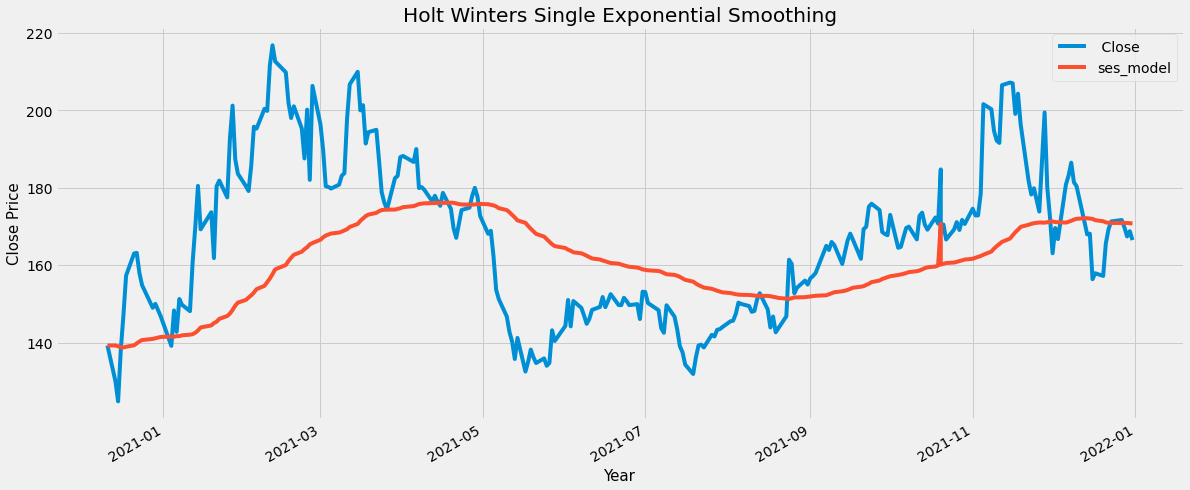

In [61]:
train[[' Close ','ses_model']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.show()


+ As expected, it didn’t fit quite well, and rightfully because, Single ES doesn’t work for data with Trends and Seasonality.
+ Double HWES
 * So, we’d fit the data on Double ES, on both Additive and Multiplicative Trend,

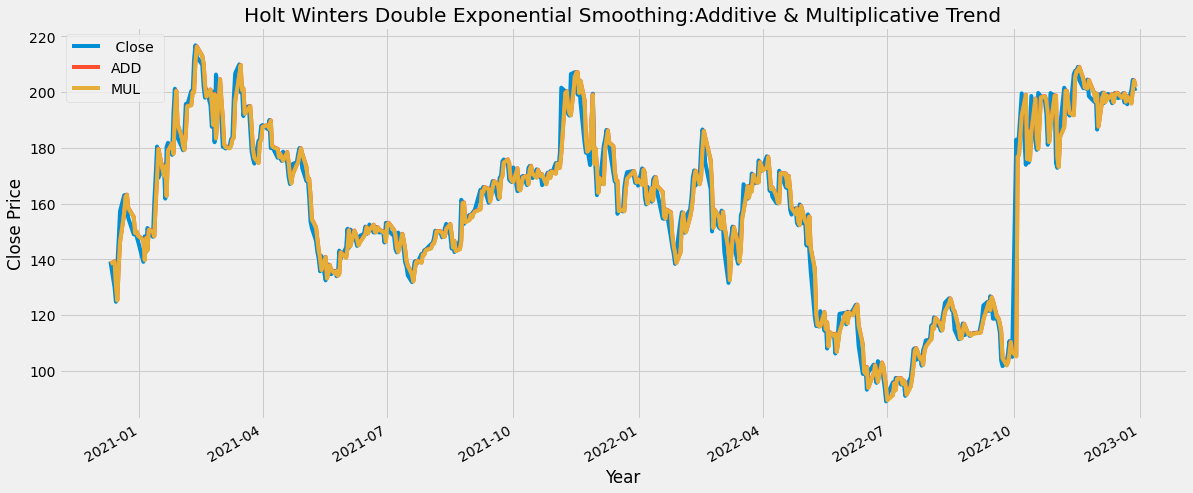

In [62]:
# check for duplicate index values and remove them
duplicate_index = df[df.index.duplicated()].index
if len(duplicate_index) > 0:
    df = df[~df.index.duplicated(keep='first')]

# check for duplicate column names and remove them
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    df = df.loc[:, ~df.columns.duplicated()]

# Fit the models
add_model = ExponentialSmoothing(df[' Close '],trend='add').fit()
mul_model = ExponentialSmoothing(df[' Close '],trend='mul').fit()

# Add the fitted values to the DataFrame
df["ADD"] = add_model.fittedvalues
df["MUL"] = mul_model.fittedvalues

# Plot the original data and the fitted values
df[[' Close ','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend()
plt.show()


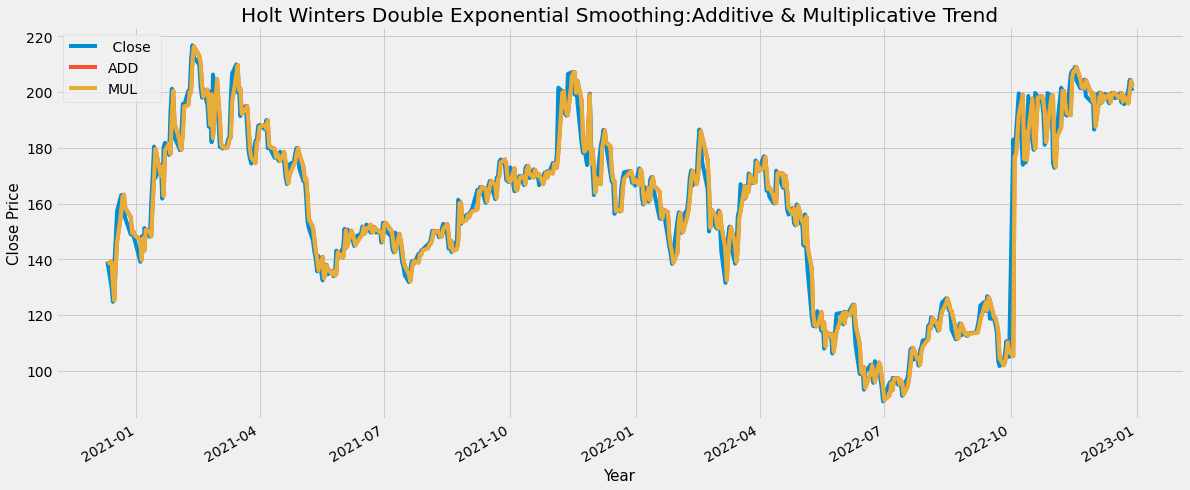

In [63]:
df[[' Close ','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.show()



 ### Forecasting with Holt-Winters Exponential Smoothing (Triple ES):

 + Let’s try and forecast sequences, let us start by dividing the dataset into Train and Test Set.



In [64]:
train = df[' Close ']
fitted_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=24).fit()

In [65]:
# Fit the model tend='add', season='add'

test_predictions = fitted_model.forecast(249)
test_predictions.index = df[' Close '].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2022-01-05    199.510180
2022-01-06    199.156579
2022-01-07    196.809297
2022-01-10    196.652752
2022-01-11    197.506876
                 ...    
2022-12-23    196.711804
2022-12-26    196.338505
2022-12-27    194.249932
2022-12-28    194.386441
2022-12-29    194.154247
Length: 249, dtype: float64


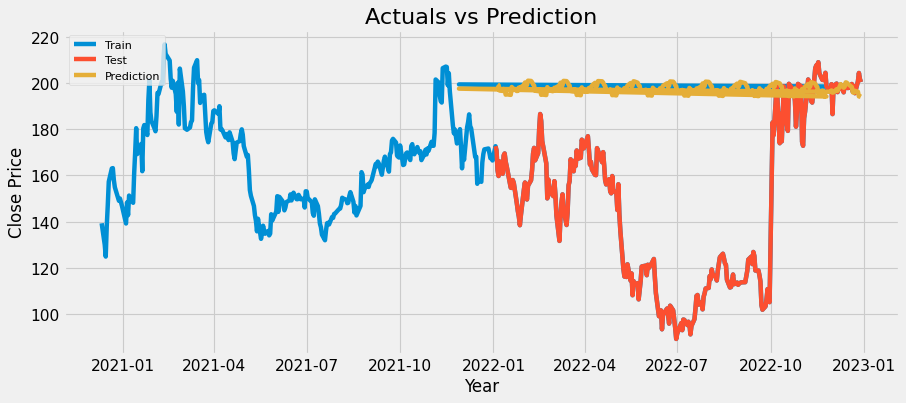

In [66]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

**Here, also we can see that our prediction using Holt Winter Method is straight.** 
+ We will be using SARIMA Model only because, SARIMA has more input parameters than Holt-Winters Method and has a better prediction.

In [67]:
start = len(train) - 250
end = len(train) - 1


In [68]:
# Make predictions for the next 250 time steps
test_predictions = fitted_model.forecast(250)

# Set the index of the predictions to match the original data's index
test_predictions.index = df.index[start:end+1]


In [69]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  3689.615596822119
Root Mean Squared Error (RMSE) =  60.74
Mean Absolute Error (MAE)  =  50.25920839771273
Mean Absolute Percentage Error (MAPE)  =  0.41941624132532845


In [70]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(250)
test_predictions.index = df[' Close '].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2022-01-04    199.646830
2022-01-05    199.420913
2022-01-06    197.199381
2022-01-07    197.171638
2022-01-10    198.156967
                 ...    
2022-12-23    227.038333
2022-12-26    224.761809
2022-12-27    225.053492
2022-12-28    224.920273
2022-12-29    229.006614
Length: 250, dtype: float64


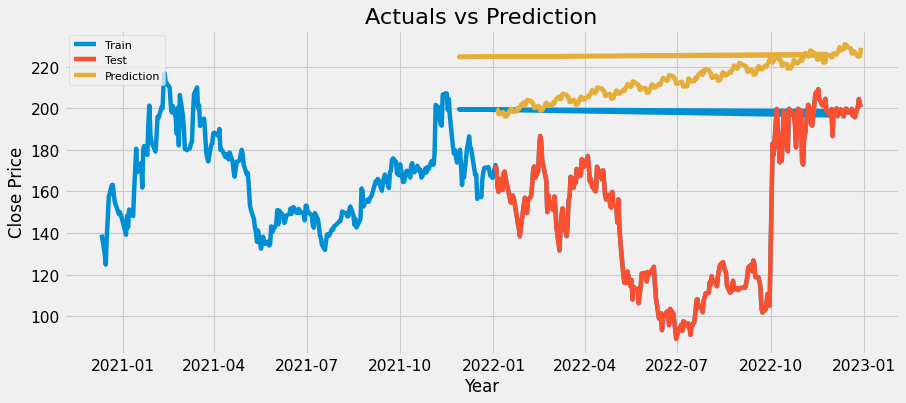

In [71]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [72]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  5412.017230746454
Root Mean Squared Error (RMSE) =  73.57
Mean Absolute Error (MAE)  =  64.88587882857713
Mean Absolute Percentage Error (MAPE)  =  0.524753927855164


In [73]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(250)
test_predictions.index = df[' Close '].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2022-01-04    199.514184
2022-01-05    199.072366
2022-01-06    197.076330
2022-01-07    196.352514
2022-01-10    196.681458
                 ...    
2022-12-23    197.514835
2022-12-26    196.018995
2022-12-27    195.886574
2022-12-28    195.906509
2022-12-29    199.785982
Length: 250, dtype: float64


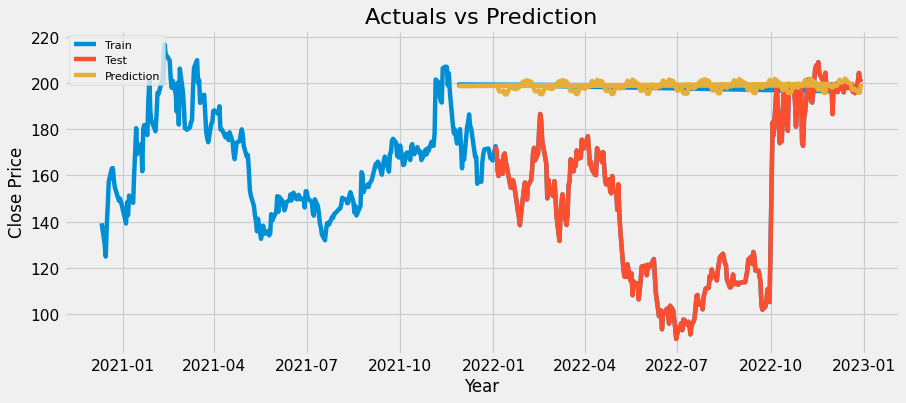

In [74]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [75]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  3789.8712034468067
Root Mean Squared Error (RMSE) =  61.56
Mean Absolute Error (MAE)  =  50.9820685809525
Mean Absolute Percentage Error (MAPE)  =  0.4252880070477534


In [76]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(250)
test_predictions.index = df[' Close '].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2022-01-04    199.645876
2022-01-05    199.343816
2022-01-06    197.471582
2022-01-07    196.885251
2022-01-10    197.338380
                 ...    
2022-12-23    225.161111
2022-12-26    223.774125
2022-12-27    223.748200
2022-12-28    223.899834
2022-12-29    227.895590
Length: 250, dtype: float64


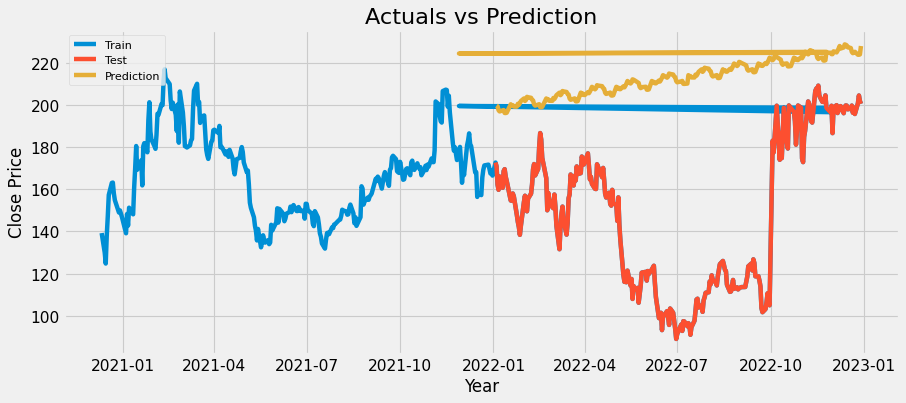

In [77]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [78]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  5339.162783218963
Root Mean Squared Error (RMSE) =  73.07
Mean Absolute Error (MAE)  =  64.31225514760138
Mean Absolute Percentage Error (MAPE)  =  0.5207883172058434


## Conclusion 

1) We will be selecting SARIMA model because our data is  Seasonal.       

2) SARIMA has more input parameters than Holt-Winters Method and has a better prediction.                                                      

3) SARIMA model is accurate on short-period forecasting but less accurate on long-period forecasting.

## APPLYING SARIMA

### SARIMA

In [86]:
df

,Close,ADD,MUL
Date,,,
2020-12-11,139.25,138.482167,138.497069
2020-12-14,130.00,139.309671,139.192921
2020-12-15,124.80,130.856991,130.725126
2020-12-16,137.99,125.399643,125.267998
2020-12-17,147.05,137.114287,136.991406
...,...,...,...
2022-12-23,195.68,198.669680,198.543113
2022-12-26,200.71,196.036961,195.908232
2022-12-27,204.44,200.460696,200.335384


In [93]:
df.drop([ 'ADD', 'MUL'],inplace=True,axis=1)
df.head()

,Close
Date,
2020-12-11,139.25
2020-12-14,130.00
2020-12-15,124.80
2020-12-16,137.99
2020-12-17,147.05


In [95]:
model_sarima_final = sm.tsa.SARIMAX(df,order=(0,1,2),seasonal_order=(1,1,0,24))
sarima_fit_final = model_sarima_final.fit()

In [96]:
# Forecasting for next 30 days
forecast = sarima_fit_final.predict(len(df),len(df)+29)
forecast_df = pd.DataFrame(forecast)
# forecast_df.columns = ['Close']
forecast_df

,predicted_mean
517,198.835810
518,191.931679
519,196.836314
520,195.548339
521,201.424222
522,190.556307
523,187.788138
524,194.990539
525,195.558254
526,203.183511


In [97]:
# Set appropriate date as index for plotting forecast data
datetime = pd.date_range('2023-01-01', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['Date'])

df_forecast = forecast_df.set_index(date_df.Date)
df_forecast

,predicted_mean
Date,
2023-01-02,198.835810
2023-01-03,191.931679
2023-01-04,196.836314
2023-01-05,195.548339
2023-01-06,201.424222
2023-01-09,190.556307
2023-01-10,187.788138
2023-01-11,194.990539
2023-01-12,195.558254


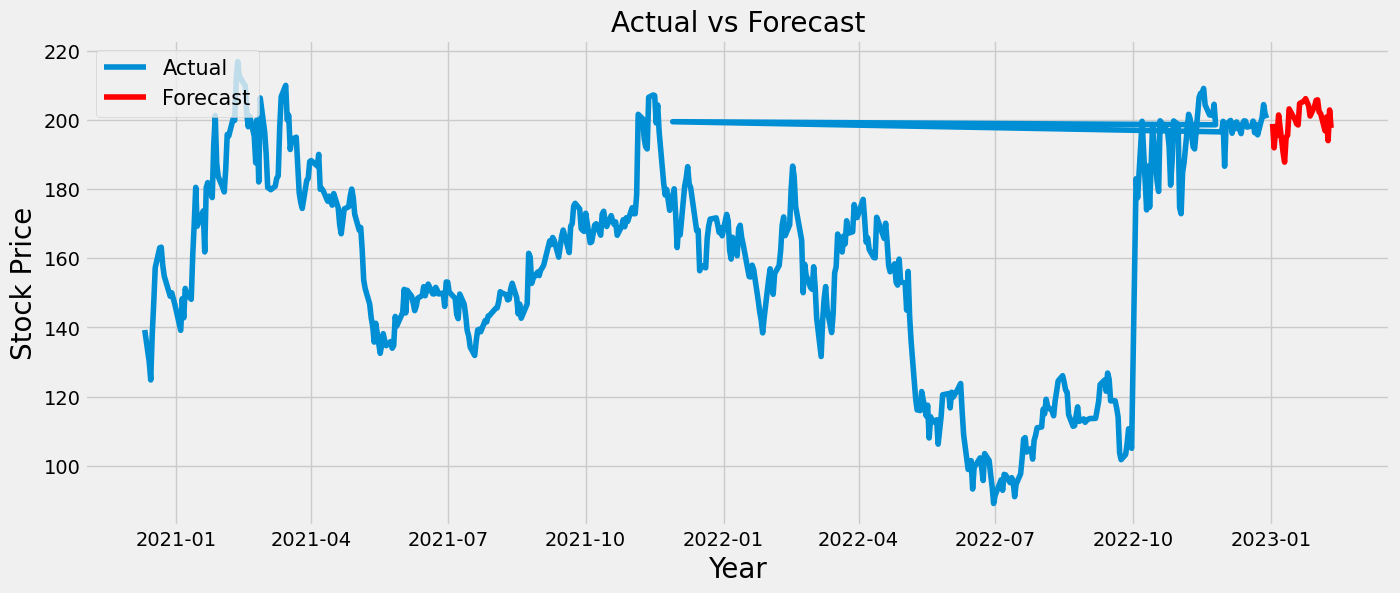

In [98]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(df, label = 'Actual')
plt.plot(df_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast');plt.xlabel('Year', fontsize=20);plt.ylabel('Stock Price', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
plt.grid(True)
plt.show()

In [100]:
from pickle import dump

In [101]:
dump(df,open('df.sav','wb'))
dump(datetime,open('datetime.sav','wb'))